## importing libraries

In [1]:
from matplotlib import pyplot as plt
import wave, sys, os
from IPython import display as ipd
import numpy as np

## function to visualize dog bark's .wav audios

In [2]:
def audioVisualizer(filePath):    
    wav = wave.open(filePath, "r")            
    raw = wav.readframes(-1) #-1 =all frame of audio must be read    
    raw = np.frombuffer(raw, dtype="int16")        
    
    #getting frame rate from raw audio signal
    f_rate = wav.getframerate()
    
    #calculating the times from raw audio signal
    time = np.linspace(
        0, # start
        len(raw) / f_rate,
        num = len(raw)
    )
    
    #wave only support mono channel
    if(wav.getnchannels() == 2):
        print("Stereo Files are not supported. Use Mono Files")
        sys.exit()
            
    #plotting waveform graph
    basename = os.path.basename(filePath) #getting file based name
    plt.title("Waveform of %s" % (basename))
    plt.plot(time, raw, color="blue")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()    
    

## start visualizing each labels of dog barks

<b>Some info about label related to dog emotion:</b>

```
growling = angry dog
howl = get ur dog to the vet, the dog might be suffering/sad (sick dog)
bow-wow   #happy dog / dog are communicating (happy dog)
```

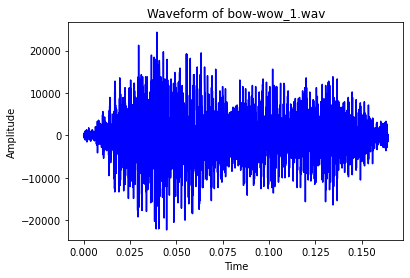

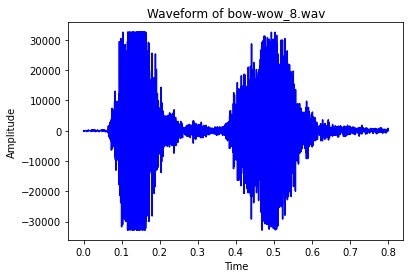

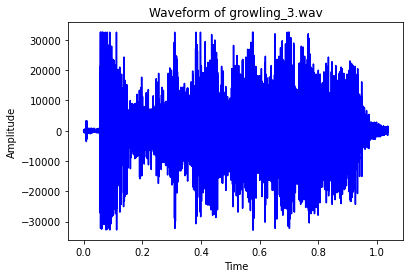

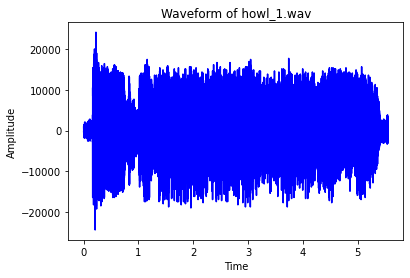

In [3]:
#init 3 label of dog bark audio file path
dogBarksAudioDir = "editedBarks/"
bow = "bow-wow/bow-wow_1.wav"
bow_wow = "bow-wow/bow-wow_8.wav"
growling = "growling/growling_3.wav"
howl = "howl/howl_1.wav"

#plot waveform graph of these labels
audioVisualizer("%s%s" % (dogBarksAudioDir, bow))
ipd.display(ipd.Audio("%s%s" % (dogBarksAudioDir, bow)))

audioVisualizer("%s%s" % (dogBarksAudioDir, bow_wow))
ipd.display(ipd.Audio("%s%s" % (dogBarksAudioDir, bow_wow)))

audioVisualizer("%s%s" % (dogBarksAudioDir, growling))
ipd.display(ipd.Audio("%s%s" % (dogBarksAudioDir, growling)))

audioVisualizer("%s%s" % (dogBarksAudioDir, howl))
ipd.display(ipd.Audio("%s%s" % (dogBarksAudioDir, howl)))

## Load & Pre-Processing

Extracting audio features using librosa

In [81]:
import librosa
import pandas as pd

In [82]:
def audioFeatureExtractor(filePath):
    audio, sample_rate = librosa.load(filePath, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0) #scaling
    
    return mfccs_scaled_features

Start iteration extracting audio features

In [83]:
dogBarksAudioDir = "editedBarks"
labels = ['bow-wow', 'growling', 'howl']
extracted_features = []

#extracting audio features from each labelled directory with audio
for label in labels:
    fileDir = "%s/%s/" % (dogBarksAudioDir, label) 
    #getting wav files in directory
    files =  [f for f in os.listdir(fileDir) if ".wav" in f]
    
    for file in files:
        filePath = '%s%s' % (fileDir, file)
        data = audioFeatureExtractor(filePath)
        extracted_features.append([data, label])


converting extracted_features into Pandas dataframe

In [84]:
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature', 'class'])

#peak 5 results
extracted_features_df.head() 

,feature,class
0,"[-172.25468, -17.27532, -24.850897, -23.064583...",bow-wow
1,"[-70.43721, -12.256557, -40.769714, -29.876968...",bow-wow
2,"[-138.35191, 160.90584, -82.907875, -21.042604...",bow-wow
3,"[-168.46394, 92.96472, -107.08077, -9.013321, ...",bow-wow
4,"[-132.16565, 147.04985, -96.683266, -12.094917...",bow-wow


Split the dataset into independent and dependent dataset

In [85]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

Preview on what's inside X & y

In [86]:
X.shape

(60, 40)

In [87]:
X[0]

array([-172.25468  ,  -17.27532  ,  -24.850897 ,  -23.064583 ,
        -63.51372  ,    4.2265077,  -42.78235  ,   -5.6010404,
        -21.33384  ,   -1.154638 ,   -8.866765 ,   20.741575 ,
          2.5955904,    6.069121 ,    6.7702594,   22.71015  ,
         -7.919958 ,    7.5099945,   -6.7898808,    2.491193 ,
         -6.414121 ,   -2.6585596,   -7.8534293,   -2.7539303,
         -2.4273846,    3.9780045,    2.0775096,    5.4328246,
         -3.5214758,    4.253925 ,   -4.449036 ,    3.4485362,
         -3.3458369,    2.8961315,   -2.3168457,    2.910345 ,
         -1.6934305,    4.2768173,   -2.1201594,    2.7739966],
      dtype=float32)

In [88]:
y

array(['bow-wow', 'bow-wow', 'bow-wow', 'bow-wow', 'bow-wow', 'bow-wow',
       'bow-wow', 'bow-wow', 'bow-wow', 'bow-wow', 'bow-wow', 'bow-wow',
       'bow-wow', 'bow-wow', 'bow-wow', 'bow-wow', 'bow-wow', 'bow-wow',
       'bow-wow', 'bow-wow', 'growling', 'growling', 'growling',
       'growling', 'growling', 'growling', 'growling', 'growling',
       'growling', 'growling', 'growling', 'growling', 'growling',
       'growling', 'growling', 'growling', 'growling', 'growling',
       'growling', 'growling', 'howl', 'howl', 'howl', 'howl', 'howl',
       'howl', 'howl', 'howl', 'howl', 'howl', 'howl', 'howl', 'howl',
       'howl', 'howl', 'howl', 'howl', 'howl', 'howl', 'howl'],
      dtype='<U8')

Label Encoder: converting the labels into numeric form

In [89]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))

In [90]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

## Splitting

splitting dataset into training, validation & testing

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
X_shuffled, y_shuffled = shuffle(X,y,random_state=0)

X_train,X_test,y_train,y_test = train_test_split(X_shuffled,y_shuffled,test_size=0.2,random_state=0,stratify=y_shuffled)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (48, 40)
y_train shape: (48, 3)
X_test shape: (12, 40)
y_test shape: (12, 3)


## Building Model

Directory to save best models

In [101]:
# os.mkdir('best_models_hdc')

import modules & params

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [94]:
%load_ext autoreload
%autoreload 2
import helper_module as hm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
num_labels=y.shape[1] #no. of classes

In [96]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [97]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 100)               4100      
_________________________________________________________________
activation_11 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 200)               20200     
_________________________________________________________________
activation_12 (Activation)   (None, 200)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)              

### Train Dog Bark Classification Model

finding best epochs for the model & save

In [119]:
num_epochs = 100
num_batch_size = 32

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

checkpointer = ModelCheckpoint(filepath='best_models_hdc/dog_barks_classification.hdf5', 
                               verbose=1, save_best_only=True)

hist = model.fit(X_train, y_train, 
                 batch_size=num_batch_size, 
                 epochs=num_epochs, 
                 validation_data=(X_test, y_test), 
                 callbacks=[checkpointer],
                 verbose=1)


Epoch 1/100
1/2 [==============>...............] - ETA: 0s - loss: 6.6376e-05 - accuracy: 1.0000
Epoch 00001: val_loss improved from inf to 0.81593, saving model to best_models_hdc\dog_barks_classification.hdf5
2/2 [==============================] - 1s 363ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.8159 - val_accuracy: 0.8333
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 1.1176e-08 - accuracy: 1.0000
Epoch 00002: val_loss did not improve from 0.81593
2/2 [==============================] - 0s 17ms/step - loss: 1.2691e-06 - accuracy: 1.0000 - val_loss: 1.0914 - val_accuracy: 0.8333
Epoch 3/100
1/2 [==============>...............] - ETA: 0s - loss: 2.2352e-08 - accuracy: 1.0000
Epoch 00003: val_loss did not improve from 0.81593
2/2 [==============================] - 0s 11ms/step - loss: 1.4653e-07 - accuracy: 1.0000 - val_loss: 1.3792 - val_accuracy: 0.8333
Epoch 4/100
1/2 [==============>...............] - ETA: 0s - loss: 0.0353 - accuracy: 0.9688
Epoch 0

1/2 [==============>...............] - ETA: 0s - loss: 3.7253e-09 - accuracy: 1.0000
Epoch 00030: val_loss did not improve from 0.81593
2/2 [==============================] - 0s 12ms/step - loss: 2.4835e-09 - accuracy: 1.0000 - val_loss: 3.6310 - val_accuracy: 0.7500
Epoch 31/100
1/2 [==============>...............] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 00031: val_loss did not improve from 0.81593
2/2 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.5878 - val_accuracy: 0.7500
Epoch 32/100
1/2 [==============>...............] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 00032: val_loss did not improve from 0.81593
2/2 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.5514 - val_accuracy: 0.7500
Epoch 33/100
1/2 [==============>...............] - ETA: 0s - loss: 4.4703e-08 - accuracy: 1.0000
Epoch 00033: val_loss did not improve from 0.81593
2/2 [================

1/2 [==============>...............] - ETA: 0s - loss: 2.9802e-08 - accuracy: 1.0000
Epoch 00059: val_loss did not improve from 0.81593
2/2 [==============================] - 0s 12ms/step - loss: 2.7815e-07 - accuracy: 1.0000 - val_loss: 3.3031 - val_accuracy: 0.7500
Epoch 60/100
1/2 [==============>...............] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 00060: val_loss did not improve from 0.81593
2/2 [==============================] - 0s 13ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.3020 - val_accuracy: 0.7500
Epoch 61/100
1/2 [==============>...............] - ETA: 0s - loss: 0.3574 - accuracy: 0.9688
Epoch 00061: val_loss did not improve from 0.81593
2/2 [==============================] - 0s 10ms/step - loss: 0.2383 - accuracy: 0.9792 - val_loss: 3.5157 - val_accuracy: 0.7500
Epoch 62/100
1/2 [==============>...............] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 00062: val_loss did not improve from 0.81593
2/2 [========================

Epoch 89/100
1/2 [==============>...............] - ETA: 0s - loss: 2.0862e-07 - accuracy: 1.0000
Epoch 00089: val_loss did not improve from 0.81593
2/2 [==============================] - 0s 15ms/step - loss: 1.3908e-07 - accuracy: 1.0000 - val_loss: 3.5488 - val_accuracy: 0.7500
Epoch 90/100
1/2 [==============>...............] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 00090: val_loss did not improve from 0.81593
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 3.6386 - val_accuracy: 0.7500
Epoch 91/100
1/2 [==============>...............] - ETA: 0s - loss: 0.0060 - accuracy: 1.0000
Epoch 00091: val_loss did not improve from 0.81593
2/2 [==============================] - 0s 10ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 3.7755 - val_accuracy: 0.7500
Epoch 92/100
1/2 [==============>...............] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 00092: val_loss did not improve from 0.81593
2/2 [===================

### Test accuracy for the model

In [124]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print("[*] Test Accuracy: " + str(test_accuracy[1]))

[*] Test Accuracy: 0.75


### Test model prediction

In [125]:
#labels = ['bow-wow', 'growling', 'howl']
#bow-wow = 0, growling = 1, howl = 2
model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([1, 2, 2, 1, 0, 2, 1, 2, 2, 1, 1, 0], dtype=int64)

1st result

In [126]:
#1st result data
X_test[0]

array([-187.25787   ,  143.08353   ,  -69.48615   ,   14.232707  ,
        -27.360384  ,  -13.178079  ,  -13.049286  ,    4.060593  ,
        -13.715169  ,   11.679838  ,  -11.884015  ,    0.7555894 ,
        -24.114576  ,    6.2181797 ,  -10.136039  ,   -0.93053776,
        -11.68405   ,   -2.7121515 ,  -13.0894785 ,    2.4485784 ,
         -2.6435406 ,    3.4027994 ,   -4.9416924 ,    5.080973  ,
          1.5116743 ,    3.0687711 ,   -5.4778595 ,    2.8992343 ,
         -0.8576316 ,   -0.84663975,   -0.5754308 ,    1.3162353 ,
         -4.29458   ,    1.2178607 ,   -2.1388853 ,   -0.6434415 ,
         -4.611982  ,   -2.846361  ,   -0.96040964,   -0.57435507],
      dtype=float32)

In [139]:
#the original data in pandas 
extracted_features_df.iloc[26]

feature    [-187.25787, 143.08353, -69.48615, 14.232707, ...
class                                               growling
Name: 26, dtype: object

Bases on the result shows, it seems that the 1st result was predict correctly with the barking sound 'growling'.

## Test Model With Dog Barks

In [142]:
model_file_name = 'dog_barks_classification.hdf5'
chosen_model = load_model(os.path.join('best_models_hdc',model_file_name))

#bow-wow = 0, growling = 1, howl = 2

In [183]:
dogBarksAudioDir = "testData/"
bow_wow = "bow-wow/bow-wow_"
growling = "growling/growling_"
howl = "howl/howl_"

labels = ['bow-wow', 'growling', 'howl']

for i in range(3): 
    filePath = "%s%s%d%s" % (dogBarksAudioDir, bow_wow, i, ".wav")

    audio, sample_rate = librosa.load(filePath, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0) #scaling
    data = mfccs_scaled_features.reshape(1,-1)
    
    ipd.display(ipd.Audio("%s" % (filePath)))
    
    predicted_label = chosen_model.predict_classes(data)
    
    print("[*] Predicted Label: " + labels[predicted_label[0]])

[*] Predicted Label: bow-wow


[*] Predicted Label: bow-wow


[*] Predicted Label: bow-wow


In [184]:
for i in range(3): 
    filePath = "%s%s%d%s" % (dogBarksAudioDir, growling, i, ".wav")

    audio, sample_rate = librosa.load(filePath, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0) #scaling
    data = mfccs_scaled_features.reshape(1,-1)
    
    ipd.display(ipd.Audio("%s" % (filePath)))
    
    predicted_label = chosen_model.predict_classes(data)
    
    print("[*] Predicted Label: " + labels[predicted_label[0]])

[*] Predicted Label: growling


[*] Predicted Label: growling


[*] Predicted Label: growling


In [187]:
for i in range(3): 
    filePath = "%s%s%d%s" % (dogBarksAudioDir, howl, i, ".wav")

    audio, sample_rate = librosa.load(filePath, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0) #scaling
    data = mfccs_scaled_features.reshape(1,-1)
    
    ipd.display(ipd.Audio("%s" % (filePath)))
    
    predicted_label = chosen_model.predict_classes(data)
    
    print("[*] Predicted Label: " + labels[predicted_label[0]])

[*] Predicted Label: howl


[*] Predicted Label: howl


[*] Predicted Label: howl
